# MAT281 - Laboratorio N°06



## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [3]:
s=df["species"].unique() #se revisan las entredas de especies
n=len(df["species"].unique())
print("el conteo de elementos en la columna species son:", n, "las cuales son", s)

el conteo de elementos en la columna species son: 11 las cuales son ['setosa' ' virginica' 'VIRGINICA' 'virginica' 'virginica ' 'versicolor'
 'Versicolor' 'VERSICOLOR' nan 'Setosa' 'SETOSA']


In [4]:
#se corriguen los datos
df['species']=df['species'].str.lower().str.strip() #cambia de mayuscula a minusculas
df.loc[df["species"]==' virginica','species']='virginica' #se corriguen los espacios iniciales
df.loc[df["species"]=='virginica ','species']='virginica' #se corriguen los espacios finales
df.loc[df["species"].isnull(),"species"]="default" #se definen default los valores nan

s=df["species"].unique() #se revisan las entredas de especies
n=len(df["species"].unique())
print("el conteo de elementos en la columna species son:", n, "las cuales son", s)
#Si bien en bases dicen que solo existen tres tipos (setosa, virginia y versicolor), en mi opinión hay un error ya que en el Iris dataset e imagen die virginica
# ahora si es virginia en lugar de virginica, borrar siguient comentario
#df.loc[df["species"]=='virginica','species']='virginia' #se corriguen los espacios

el conteo de elementos en la columna species son: 4 las cuales son ['setosa' 'virginica' 'versicolor' 'default']


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

In [5]:
df["sepalLength"].unique()

array([4.4, 7.2, 6.3, 6.7, 5.8, 6.2, 6.8, 6.9, 7.7, 6.4, 6.5, 7.6, 7.1,
       5.6, 7.9, 5.7, 7.4, 7.3, 5.9, 6. , 6.1, 4.9, 5.4, 8. , 5.2, 6.6,
       7. , 5.5, 5.1, nan, 5. , 4.5, 4.6, 4.8, 4.7, 5.3])

<AxesSubplot:>

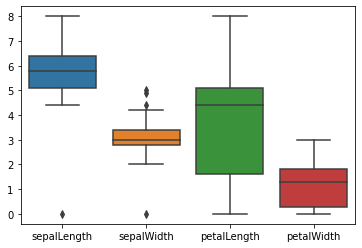

In [7]:
#corregimos los datos
df.loc[df["sepalLength"].isnull(),"sepalLength"]=0 #se hace 0 nan de sepalLength
df.loc[df["sepalWidth"].isnull(),"sepalWidth"]=0 #se hace 0 nan de sepalWidth
df.loc[df["petalLength"].isnull(),"petalLength"]=0 #se hace 0 nan de petalLength
df.loc[df["petalWidth"].isnull(),"petalWidth"]=0 #se hace 0 nan de petalWidth

df1 = df.drop(['species'], axis=1)
sns.boxplot(data=df1)

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [9]:
#primero filtraremos los datos como nos piden

SL_inf =  df['sepalLength']>=4
SL_sup =  df['sepalLength']<=7 #se pide que sepalLength este entre 4 y 7

SW_inf =  df['sepalWidth']>=2
SW_sup =  df['sepalWidth']<=4.5 #se pide que sepalWidth este entre 2 y 4.5

PL_inf =  df['petalLength']>=1
PL_sup =  df['petalLength']<=7 #se pide que petalLength este entre 1 y 7

PW_inf =  df['petalWidth']>=0.1
PW_sup =  df['petalWidth']<=2.5 #se pide que petalWidth este entre 0.1 y 2.5

mask_SL = SL_inf & SL_sup
mask_SW = SW_inf & SW_sup
mask_PL = PL_inf & PL_sup
mask_PW = PW_inf & PW_sup #se unen los límites en un mask por variable

df["label"]= mask_SL & mask_SW & mask_PL & mask_PW
df

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,False
1,7.2,3.6,6.1,2.5,virginica,False
2,6.3,3.3,6.0,2.5,virginica,True
3,6.7,3.3,5.7,2.5,virginica,True
4,6.3,3.4,5.6,2.4,virginica,True
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,True
146,4.8,3.0,1.4,0.1,setosa,True
147,4.9,3.1,1.5,0.1,setosa,True
148,4.9,3.6,1.4,0.1,setosa,True


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

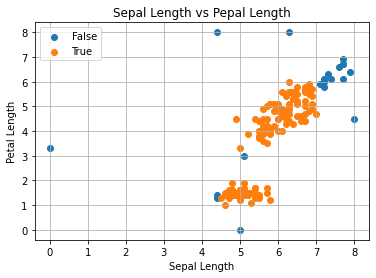

In [12]:
#gráfico sepalLength vs petalLength
fig, ax = plt.subplots() #creacion del grafico

for label in df["label"].unique():
    x= df.loc[df["label"]==label, "sepalLength"]
    y= df.loc[df["label"]==label, "petalLength"]
    ax.scatter(x, y, label=label)
ax.legend() #se agrega leyenda
ax.grid() #se le agrega grillado para que sea más fácil su lecura

plt.xlabel("Sepal Length") #titulo eje x
plt.ylabel("Petal Length") #titulo eje y
plt.title("Sepal Length vs Pepal Length") #titulo del grafico
plt.show()

Notemos que, se puede concluir que, dado que los datos "True" estan en un intervalo (Sepal Length [4,7], Petal Length [1,7]) se presentan agrupados y acotados en dicho rectangulo, mientras que los datos "False" estan fuera del intervalo por lo que estan más dispersos.
Notemos que en el rectangulo [4,7]x[1,7] aparecen algunos "False" lo cual ocurre ya que al filtrar los datos se pide que esten en los 4 intervalo (SepalLength, SepalWidth, PetalLength, PetalWidth, lo cual cual podemos asumir que estos puntitos no satisfacen las condiciones de Width

Text(0.5, 1.0, 'Sepal Width vs Pepal Width')

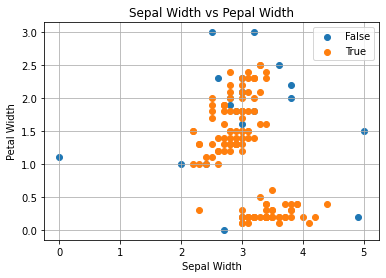

In [13]:
#gráfico sepalWidth vs petalWidth
fig, ax = plt.subplots()

for label in df["label"].unique():
    x= df.loc[df["label"]==label, "sepalWidth"]
    y= df.loc[df["label"]==label, "petalWidth"]
    ax.scatter(x, y, label=label)
ax.legend() #se agrega leyenda
ax.grid() #se le agrega grillado para que sea más fácil su lecura

plt.xlabel("Sepal Width") #titulo eje x
plt.ylabel("Petal Width") #titulo eje y
plt.title("Sepal Width vs Pepal Width") #titulo del grafico

Análogo a lo anterior los datos estan acotados, (Sepal Width [2,4.5], Petal Width [0.1,2.5]) por consecuente agrupados, mientras que los datos "False" estan fuera del intervalo por lo que estan mas dispersos.
Nuevamente en el rectangulo [2,4.5]x[0.1,2.5] aparecen algunos "False" lo cual, como ya se explico, ocurre ya que al filtrar los datos se pide que esten en los 4 intervalo (SepalLength, SepalWidth, PetalLength, PetalWidth, lo cual cual podemos asumir que estos puntitos no satisfacen las condiciones de Width

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

Text(0, 0.5, 'petalLength')

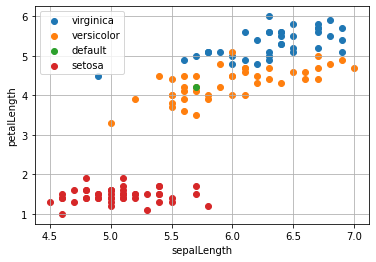

In [14]:
df_aux = df.loc[df['label']==True]
fig,ax = plt.subplots()
for specie in df_aux['species'].unique():
    x_axis = df_aux.loc[df_aux['species']==specie, 'sepalLength']
    y_axis = df_aux.loc[df_aux['species']==specie, 'petalLength']
    ax.scatter(x_axis,y_axis,label=specie)
ax.legend() #se agrega la leyenda de los datos
ax.grid() #se agrega grillado 

plt.xlabel('sepalLength')
plt.ylabel('petalLength')